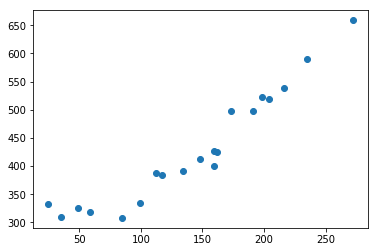

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('s2_s1_click.csv', delimiter=',', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# プロット
plt.plot(train_x, train_y, 'o')
plt.show()

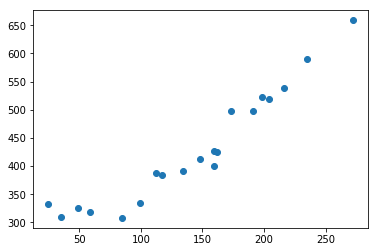

In [17]:
# パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

# 予測関数
def f(x):
    return theta0 + theta1 * x

# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 標準化
mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x - mu) / sigma


train_z = standardize(train_x)


plt.plot(train_x, train_y, 'o')
plt.show()

In [18]:
# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 学習を繰り返す

error = E(train_z, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    tmp0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    # パラメータを更新
    theta0 = tmp0
    theta1 = tmp1
    
    # 前回の誤差との差分を計算
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    
    # ログの出力
    count += 1
    log = '{}回目: theta = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))
   

In [19]:
x = np.linspace(-3, 3, 100) 

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

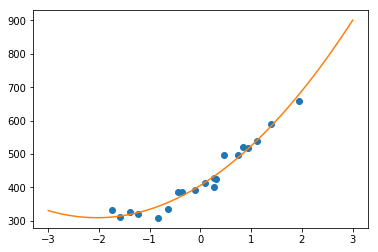

In [30]:
# 多項式回帰
# パラメータを初期化
theta = np.random.rand(3)

# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

X = to_matrix(train_z)

# 予測関数

def f(x):
    return np.dot(x, theta)

# 誤差の差分
diff = 1

# 学習を繰り返す
error = E(X, train_y)
while diff > 1e-2:
    # パラメータを更新
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 旋回の誤差との差分を計算
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error
    

x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()

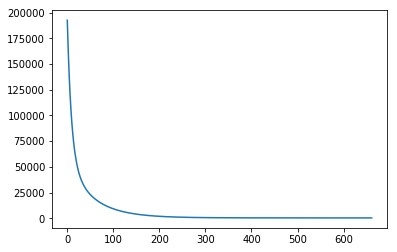

In [31]:
# 平均二乗誤差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

# パラメータをランダムに初期化
theta = np.random.rand(3)

# 平均二乗誤差の履歴
errors = []

# 誤差の差分
diff = 1

# 学習を繰り返す
errors.append(MSE(X, train_y))
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]
    
# 誤差をプロット
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()

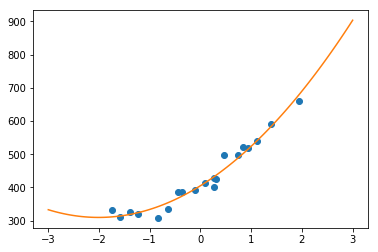

In [32]:
# 確率的勾配降下法
# パラメータをランダムに初期化

theta = np.random.rand(3)

# 平均二乗誤差の履歴
errors = []

# 誤差の差分
diff = 1

errors.append(MSE(X, train_y))

while diff > 1e-2:
    p = np.random.permutation(X.shape[0])
    # 学習データをランダムに取り出して確率的勾配降下法でパラメータ更新
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x
    # 前回の誤差との差分を計算
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]
    
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()